# Model Validation

# I. Model Capacity

* import Packages

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* Colab File Upload
 - Electric.csv & Cars.csv

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name = fn, length = len(uploaded[fn])))

Saving Cars.csv to Cars.csv
Saving Electric.csv to Electric.csv
User uploaded file "Cars.csv" with length 18276 bytes
User uploaded file "Electric.csv" with length 29021 bytes


* pandas DataFrame

In [3]:
Elec = pd.read_csv('Electric.csv')
# x로 y를 설명한다.
Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
compactness                  768 non-null float64
surface_area                 768 non-null float64
wall_area                    768 non-null float64
roof_area                    768 non-null float64
height                       768 non-null float64
orientation                  768 non-null int64
glazing_area                 768 non-null float64
glazing_area_distribution    768 non-null int64
electricity                  768 non-null float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


* 산점도(surface_area vs. electricity)

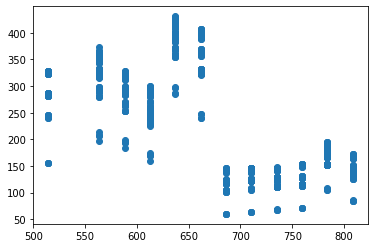

In [0]:
plt.scatter(Elec.surface_area, Elec.electricity)
plt.show()

> ## 1) 1차 모델 시각화

In [0]:
sns.regplot(x = 'surface_area', y = 'electricity',
            data = Elec,
            line_kws = {'color':'red'})
plt.show()

> ## 2) 2차 모델 시각화

In [0]:
sns.regplot(x = 'surface_area', y = 'electricity',
            data = Elec,
            line_kws = {'color':'blue'},
            order = 2)
plt.show()

> ## 3) 5차 모델 시각화

In [0]:
sns.regplot(x = 'surface_area', y = 'electricity',
            data = Elec,
            line_kws = {'color':'green'},
            order = 5)
plt.show()

> ## 4) 9차 모델 시각화

In [0]:
sns.regplot(x = 'surface_area', y = 'electricity',
            data = Elec,
            line_kws = {'color':'orange'},
            order = 9)
plt.ylim(50, 450)
plt.show()

> ## 5) 4개 모델 비교 시각화

In [0]:
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec, line_kws = {'color':'red'})
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec, line_kws = {'color':'blue'}, order = 2)
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec, line_kws = {'color':'green'}, order = 5)
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec, line_kws = {'color':'orange'}, order = 9,
            scatter_kws = {"color":"gray"})
plt.ylim(50, 450)
plt.xlim(500, 800)
plt.show()

# II. Training Error
* import Packages

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* pandas DataFrame

In [0]:
Elec = pd.read_csv('Electric.csv')

Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
compactness                  768 non-null float64
surface_area                 768 non-null float64
wall_area                    768 non-null float64
roof_area                    768 non-null float64
height                       768 non-null float64
orientation                  768 non-null int64
glazing_area                 768 non-null float64
glazing_area_distribution    768 non-null int64
electricity                  768 non-null float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


> ## 1) 1차 모델 Training Error

* 모델 생성

In [0]:
import statsmodels.formula.api as smf

Model_1 = smf.ols(formula = 'electricity ~ surface_area', data = Elec).fit()

* 모델 정보(학습결과) 확인

In [0]:
Model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            electricity   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     585.3
Date:                Thu, 21 Nov 2019   Prob (F-statistic):           1.69e-96
Time:                        02:03:52   Log-Likelihood:                -4414.9
No. Observations:                 768   AIC:                             8834.
Df Residuals:                     766   BIC:                             8843.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      729.4538     21.111     34.554      0.000     688.012     770.895
surface_area    -0.7539      0.031    -24.192      0.000      -0.815      -0.693
==============================================================================
Omnibus:                       37.973   Durbin-Watson:                   0.321
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.851
Skew:                           0.576   Prob(JB):                     4.95e-10
Kurtosis:                       2.890   Cond. No.                     5.21e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* y(실제값) 지정

In [0]:
y = Elec.electricity

len(y)

768

* y_hat(예측값) 생성

In [0]:
y_hat_1 = Model_1.predict(Elec.surface_area)
len(y_hat_1)

768

* MSE(Mean Squared Error) 계산

In [0]:
TR_Err_1 = np.mean((y - y_hat_1) ** 2)
TR_Err_1

5763.983779426341

> ## 2) 5차 모델 Training Error

* 모델 생성

In [0]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 5)
PX_5 = poly.fit_transform(Elec.surface_area.values.reshape(-1, 1))
PX_5_pred = poly.fit_transform(Elec.surface_area.values.reshape(-1, 1))

In [0]:
import statsmodels.api as sm

Model_5 = sm.OLS(y, PX_5).fit()

* 모델 정보(학습결과) 확인

In [0]:
Model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            electricity   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     363.3
Date:                Thu, 21 Nov 2019   Prob (F-statistic):          1.43e-146
Time:                        02:04:25   Log-Likelihood:                -4292.5
No. Observations:                 768   AIC:                             8593.
Df Residuals:                     764   BIC:                             8612.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.059e-07   6.56e-08    -12.284      0.000   -9.35e-07   -6.77e-07
x1            -0.0002    1.7e-05    -12.284      0.000      -0.000      -0.000
x2            -0.0340      0.003    -12.284      0.000      -0.039      -0.029
x3             0.0002   1.25e-05     13.547      0.000       0.000       0.000
x4          -2.66e-07   1.86e-08    -14.297      0.000   -3.02e-07   -2.29e-07
x5          1.352e-10   9.17e-12     14.741      0.000    1.17e-10    1.53e-10
==============================================================================
Omnibus:                       15.635   Durbin-Watson:                   0.392
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.314
Skew:                           0.313   Prob(JB):                     0.000473
Kurtosis:                       2.705   Cond. No.                     7.70e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.7e+18. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* y_hat(예측값) 생성

In [0]:
y_hat_5 = Model_5.predict(PX_5_pred)

len(y_hat_5)

768

* MSE(Mean Squared Error) 계산

In [0]:
TR_Err_5 = np.mean((y - y_hat_5) ** 2)
TR_Err_5

4190.103828125369

> ## 3) 9차 모델 Training Error

* 모델 생성

In [0]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 9)
PX_9 = poly.fit_transform(Elec.surface_area.values.reshape(-1, 1))
PX_9_pred = poly.fit_transform(Elec.surface_area.values.reshape(-1, 1))

In [0]:
import statsmodels.api as sm

Model_9 = sm.OLS(y, PX_9).fit()

* 모델 정보(학습결과) 확인

In [0]:
Model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            electricity   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     357.7
Date:                Thu, 21 Nov 2019   Prob (F-statistic):          4.67e-145
Time:                        02:04:40   Log-Likelihood:                -4296.0
No. Observations:                 768   AIC:                             8600.
Df Residuals:                     764   BIC:                             8619.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.934e-28   1.91e-29     10.114      0.000    1.56e-28    2.31e-28
x1         -1.851e-19   1.83e-20    -10.114      0.000   -2.21e-19   -1.49e-19
x2         -1.852e-22   1.83e-23    -10.114      0.000   -2.21e-22   -1.49e-22
x3          1.295e-20   1.28e-21     10.114      0.000    1.04e-20    1.55e-20
x4          4.299e-18   4.25e-19     10.114      0.000    3.46e-18    5.13e-18
x5          1.149e-15   1.14e-16     10.114      0.000    9.26e-16    1.37e-15
x6          1.933e-13   1.91e-14     10.114      0.000    1.56e-13    2.31e-13
x7         -6.233e-16   8.23e-17     -7.570      0.000   -7.85e-16   -4.62e-16
x8          6.482e-19   1.18e-19      5.515      0.000    4.17e-19    8.79e-19
x9         -2.129e-22   5.56e-23     -3.827      0.000   -3.22e-22   -1.04e-22
==============================================================================
Omnibus:                       15.214   Durbin-Watson:                   0.384
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.207
Skew:                           0.319   Prob(JB):                     0.000499
Kurtosis:                       2.736   Cond. No.                     1.12e+36
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.52e-18. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

* y_hat(예측값) 생성

In [0]:
y_hat_9 = Model_9.predict(PX_9_pred)

len(y_hat_9)

768

* MSE(Mean Squared Error) 계산

In [0]:
TR_Err_9 = np.mean((y - y_hat_9) ** 2)
TR_Err_9

4228.544652261619

> ## 4) 3개 모델 Training Error 비교

In [0]:
print('1차 모델 : ', TR_Err_1)
print('5차 모델 : ', TR_Err_5)
print('9차 모델 : ', TR_Err_9)

1차 모델 :  5763.983779426341
5차 모델 :  4190.103828125369
9차 모델 :  4228.544652261619


# III. Testing Error
* import Packages

In [0]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

* pandas DataFrame

In [6]:
Elec = pd.read_csv('Electric.csv')

len(Elec)

768

> ## Train_Data vs. Test_Data
> * 8:2 Split(614:154)

* 80% train_idx

In [7]:
random.seed(2045)
train_idx = random.sample(range(0, len(Elec)), int(len(Elec) * 0.8))

len(train_idx)

614

* 80% TR_Elec DataFrame

In [8]:
TR_Elec = Elec.iloc[train_idx]

TR_Elec.head()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
131,0.69,735.0,294.0,220.50,3.5,5,0.10,2,114.9
429,0.62,808.5,367.5,220.50,3.5,3,0.25,3,143.4
50,0.98,514.5,294.0,110.25,7.0,4,0.10,1,246.3
578,0.98,514.5,294.0,110.25,7.0,4,0.40,2,322.4
660,0.66,759.5,318.5,220.50,3.5,2,0.40,3,151.6


* 20% test_idx

In [9]:
test_idx = set(range(len(Elec))) - set(train_idx)
test_idx = list(test_idx)

len(test_idx)

154

* 20% TE_Elec DataFrame

In [10]:
TE_Elec = Elec.iloc[test_idx]

TE_Elec.head()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
515,0.69,735.0,294.0,220.5,3.5,5,0.25,5,124.7
5,0.90,563.5,318.5,122.5,7.0,3,0.00,0,214.6
6,0.90,563.5,318.5,122.5,7.0,4,0.00,0,207.1
518,0.66,759.5,318.5,220.5,3.5,4,0.25,5,127.8
8,0.86,588.0,294.0,147.0,7.0,2,0.00,0,195.0


> ## 1) 1차 모델 Testing Error

* Train_Data로 모델 생성

In [0]:
import statsmodels.formula.api as smf

Model_1 = smf.ols(formula = 'electricity ~ surface_area', data = TR_Elec).fit()

* Test_Data로 y_hat(예측값) 생성

In [0]:
y_hat_1 = Model_1.predict(TE_Elec.surface_area)

* Test_Data로 MSE(Mean Squared Error) 계산

In [13]:
TE_Err_1 = np.mean((TE_Elec.electricity - y_hat_1) ** 2)
TE_Err_1

5504.93191184252

> ## 2) 5차 모델 Testing Error

* Train_Data로 모델 생성

In [0]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 5)
PX_5_TR = poly.fit_transform(TR_Elec.surface_area.values.reshape(-1, 1))
PX_5_TE = poly.fit_transform(TE_Elec.surface_area.values.reshape(-1, 1))

In [0]:
import statsmodels.api as sm

Model_5 = sm.OLS(TR_Elec.electricity, PX_5_TR).fit()

* Test_Data로 y_hat(예측값) 생성

In [0]:
y_hat_5 = Model_5.predict(PX_5_TE)

* Test_Data로 MSE(Mean Squared Error) 계산

In [17]:
TE_Err_5 = np.mean((TE_Elec.electricity - y_hat_5) ** 2)
TE_Err_5

4247.475998133707

> ## 3) 9차 모델 Testing Error

* Train_Data로 모델 생성

In [0]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 9)
PX_9 = poly.fit_transform(TR_Elec.surface_area.values.reshape(-1, 1))
PX_9_pred = poly.fit_transform(TE_Elec.surface_area.values.reshape(-1, 1))

In [0]:
import statsmodels.api as sm

Model_9 = sm.OLS(TR_Elec.electricity, PX_9).fit()

* Test_Data로 y_hat(예측값) 생성

In [0]:
y_hat_9 = Model_9.predict(PX_9_pred)

* Test_Data로 MSE(Mean Squared Error) 계산

In [21]:
TE_Err_9 = np.mean((TE_Elec.electricity - y_hat_9) ** 2)
TE_Err_9

4220.706554571905

> ## 4) 3개 모델 Testing Error 비교

In [22]:
print('1차 모델 : ', TE_Err_1)
print('5차 모델 : ', TE_Err_5)
print('9차 모델 : ', TE_Err_9)

1차 모델 :  5504.93191184252
5차 모델 :  4247.475998133707
9차 모델 :  4220.706554571905


# IV. Vlidation Approach
* import Packages

In [0]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

* pandas DataFrame

In [24]:
CARS = pd.read_csv('Cars.csv')

CARS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


* 산점도(weight vs. mpg)

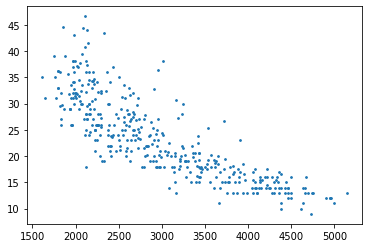

In [25]:
plt.scatter(CARS.weight, CARS.mpg, s = 3)
plt.show()

> ## Train vs. Validation vs. Test
* 6:2:2 Split(236:78:78)

> ## sklearn Package 사용
* train_test_split

* test_set

In [26]:
remain_set, test_set = train_test_split(CARS, test_size = int(len(CARS) * 0.2), random_state = 2045)

len(test_set)

78

* valid_set

In [27]:
train_set, valid_set = train_test_split(remain_set, test_size = int(len(CARS) * 0.2), random_state = 2045)

len(valid_set)

78

* train_set

In [28]:
len(train_set)

236

> ## reshape( )

In [0]:
x_train = np.array(train_set.weight.values).reshape(-1, 1)
y_train = np.array(train_set.mpg.values).reshape(-1, 1)

x_valid = np.array(valid_set.weight.values).reshape(-1, 1)
y_valid = np.array(valid_set.mpg.values).reshape(-1, 1)
 
x_test = np.array(test_set.weight.values).reshape(-1, 1)
y_test = np.array(test_set.mpg.values).reshape(-1, 1)

> ## 1) 1차 모델 Validation Error

* Train_Data로 모델 생성

In [30]:
from sklearn.linear_model import LinearRegression

Model_1 = LinearRegression()
Model_1.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* Validation_Data로 y_hat(예측값) 생성 및 MSE 계산

In [31]:
from sklearn.metrics import mean_squared_error

MSE_1 = mean_squared_error(y_valid, Model_1.predict(x_valid))
MSE_1

17.323857716497056

> ## 2) 9차 모델 Validation Error

* Train_Data로 모델 생성

In [32]:
poly = PolynomialFeatures(degree = 9)
PX_9 = poly.fit_transform(x_train)
PX9_valid = poly.fit_transform(x_valid)

Model_9 = LinearRegression()
Model_9.fit(PX_9, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* Validation_Data로 y_hat(예측값) 생성 및 MSE 계산

In [33]:
MSE_9 = mean_squared_error(y_valid, Model_9.predict(PX9_valid))
MSE_9

16.276374329837978

> ## 3) 다중회귀 모델 Validation Error

* Train_Data로 모델 생성

In [34]:
x_train_ml = train_set[['weight', 'horsepower']].values
x_valid_ml = valid_set[['weight', 'horsepower']].values
x_test_ml = test_set[['weight', 'horsepower']].values

Model_ml = LinearRegression() 
Model_ml.fit(x_train_ml, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* Validation_Data로 y_hat(예측값) 생성 및 MSE 계산

In [35]:
MSE_ml = mean_squared_error(y_valid, Model_ml.predict(x_valid_ml))
MSE_ml

16.964254785822103

> ## 4) 3개 모델 Validation Error 비교

In [36]:
print('1차 모델 MSE_1  : ', MSE_1)
print('9차 모델 MSE_9  : ', MSE_9)
print('다중회귀 MSE_ml : ', MSE_ml)

1차 모델 MSE_1  :  17.323857716497056
9차 모델 MSE_9  :  16.276374329837978
다중회귀 MSE_ml :  16.964254785822103


> ## 5) 최종 9차 모델을 Test_Data에 적용

* Test_Data로 y_hat(예측값) 생성 및 MSE 계산

In [0]:
PX9_test = poly.fit_transform(x_test)

mean_squared_error(y_test, Model_9.predict(PX9_test))

9.260029888421302

# V. Cross Validation
* import Packages

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.utils.validation import column_or_1d

* pandas DataFrame

In [0]:
CARS = pd.read_csv('Cars.csv')

> ## 1) 5-Fold Cross Validation

In [0]:
X = np.array(CARS.horsepower.values).reshape(-1, 1)
y = np.array(CARS.mpg.values).reshape(-1, 1)

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

In [0]:
scores = []
best_svr = SVR(kernel = 'rbf')
cv = KFold(n_splits = 5, random_state = 2045, shuffle = True)

for train_index, test_index in cv.split(X):
    # print("Train Index: ", train_index, "\n")
    # print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    best_svr.fit(X_train, y_train)
    scores.append(best_svr.score(X_test, y_test))

In [0]:
best_svr.fit(X_train, y_train)

scores.append(best_svr.score(X_test, y_test))

In [0]:
scores

In [0]:
np.mean(scores)

> ## 2) LOOCV(Leave-One-Out Cross Validation)

In [0]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [0]:
from sklearn.model_selection import cross_val_score, LeaveOneOut, KFold

loocv = LeaveOneOut()

X = CARS.horsepower.values.reshape(-1,1)
y = CARS.mpg.values.reshape(-1,1)

loocv.get_n_splits(X)

In [0]:
crossvalidation = KFold(n_splits = len(CARS), random_state = None, shuffle = False)

scores = cross_val_score(model, X, y, scoring = "neg_mean_squared_error", cv = crossvalidation, n_jobs = 1)

print("Folds: " + str(len(scores)) + ", MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

# 
# 
# 
# The End
# 
# 
# 